# Logistic regression for a 2D classification problem

Imports...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

## Load and visualize data

In [2]:
data = pd.read_csv("2d-classification-data.csv")
data.head(10)

,x1,x2,y
0,-2.344884,0.708506,0.0
1,0.251627,0.326075,0.0
2,0.252258,1.082367,0.0
3,-0.742000,1.870836,0.0
4,-0.642800,1.048103,0.0
5,-1.663671,0.876067,0.0
6,-2.093821,1.911324,0.0
7,-1.277416,-0.140354,0.0
8,-0.843836,1.062229,0.0
9,-0.165888,0.938029,0.0


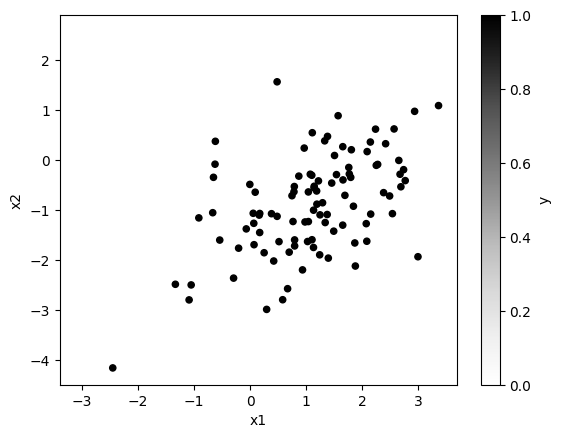

In [3]:
data.plot.scatter(x="x1", y="x2", c="y");

## Define and fit the model

In [4]:
# Select model input variables
X = data[["x1", "x2"]].copy()
X

,x1,x2
0,-2.344884,0.708506
1,0.251627,0.326075
2,0.252258,1.082367
3,-0.742000,1.870836
4,-0.642800,1.048103
...,...,...
195,1.505849,0.098011
196,0.978849,-1.230757
197,2.382208,-0.644653
198,0.788139,-0.522176


In [7]:
# Define a model and fit it
# Note: sklearn.linear_model.LogisticRegression adds an intercept automatically.
model = LogisticRegression(penalty="none")
model.fit(X, data["y"])

LogisticRegression(penalty='none')

In [8]:
# Parameters
beta_1, beta_2 = model.coef_[0]
beta_0 = model.intercept_.item()
print(beta_0, beta_1, beta_2)

0.3037005781820909 2.8559643044851333 -2.6849227248868117


In [9]:
# Alternative: statsmodels
model_sm = sm.Logit(data["y"], sm.add_constant(X))
results = model_sm.fit()
print(results.summary())

# beta_0, beta_1, beta_2 = results.params
# print(beta_0, beta_1, beta_2)

Optimization terminated successfully.
         Current function value: 0.089500
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  200
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                            2
Date:                Mon, 27 Nov 2023   Pseudo R-squ.:                  0.8709
Time:                        15:37:11   Log-Likelihood:                -17.900
converged:                       True   LL-Null:                       -138.63
Covariance Type:            nonrobust   LLR p-value:                 3.697e-53
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3037      0.477      0.637      0.524      -0.631       1.238
x1             2.8560      0.

## Use model for Prediction

In [10]:
# Prediction of training samples
data['prediction'] = model.predict(X)
data['probability'] = model.predict_proba(X)[:,1]

In [11]:
# Alternative: statsmodels
data['prediction_sm'] = (model_sm.predict(results.params) > 0.5) * 1.0
data['probability_sm'] = model_sm.predict(results.params)

## Visualization

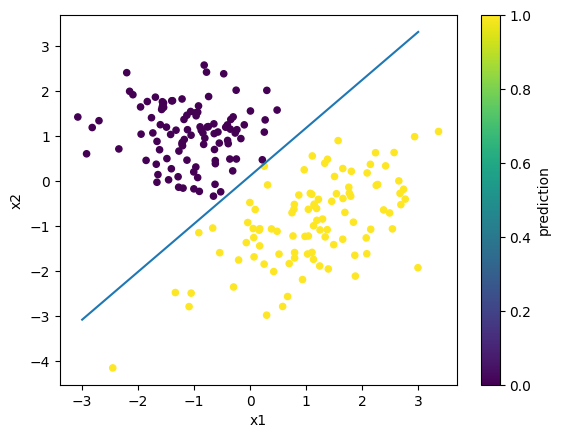

In [17]:
# Predictions with decision boundary
data.plot.scatter(x="x1", y="x2", c="prediction", colormap='viridis');
x1 = np.array([-3, 3])
x2 = (- x1 * beta_1 - beta_0) / beta_2
plt.plot(x1, x2);

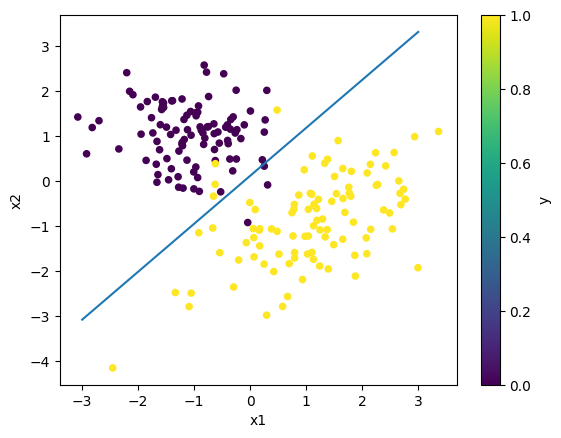

In [16]:
# Decision boundary vs. ground truth
data.plot.scatter(x="x1", y="x2", c="y", colormap='viridis');
x1 = np.array([-3, 3])
x2 = (- x1 * beta_1 - beta_0) / beta_2
plt.plot(x1, x2);

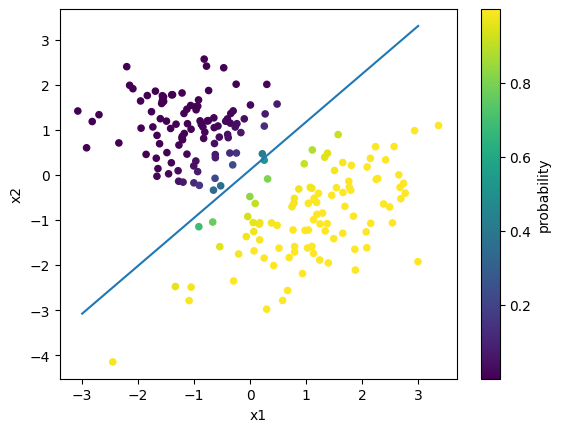

In [18]:
# Probabilities
data.plot.scatter(x="x1", y="x2", c="probability", colormap='viridis');
x1 = np.array([-3, 3])
x2 = (- x1 * beta_1 - beta_0) / beta_2
plt.plot(x1, x2);

In [19]:
data.to_csv("results.csv", index=False)

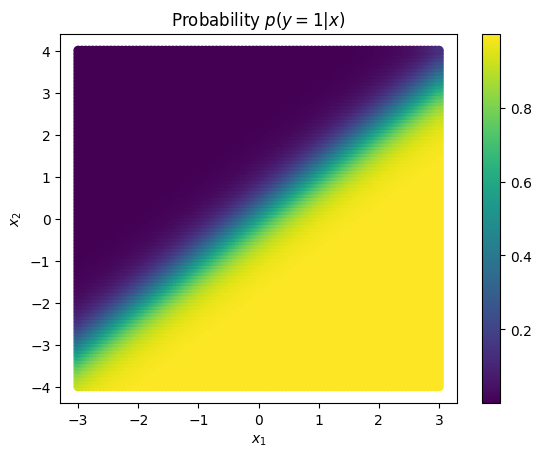

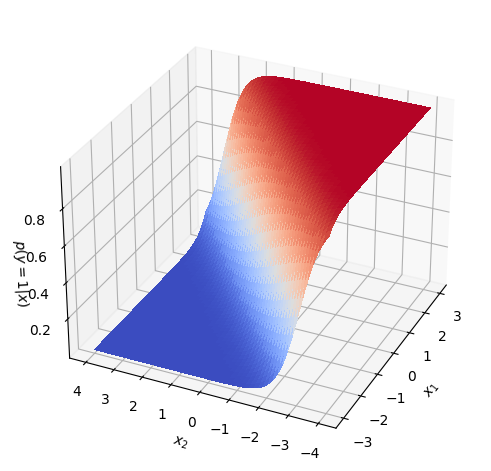

In [21]:
# Bonus: Visualize learned decision probability (here: with statsmodels)
X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-4, 4, 100))
points = np.concatenate([X[..., None], Y[..., None]], axis=-1).reshape(-1, 2)
probs = model_sm.predict(results.params, sm.add_constant(points))

plt.scatter(X, Y, c=probs);
plt.colorbar();
plt.xlabel("$x_1$");
plt.ylabel("$x_2$");
plt.title("Probability $p(y = 1 | x)$");

from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X.reshape(100, 100), 
                       Y.reshape(100, 100), 
                       probs.reshape(100, 100), 
                       cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel("$x_1$");
ax.set_ylabel("$x_2$");
ax.set_zlabel("$p(y = 1 | x)$");
ax.view_init(30, 360-155);
ax.zaxis.labelpad=-2.5;
fig.tight_layout();